In [1]:
#import sys
#sys.path.insert(0,"/workspace/bt")

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from strategy import *

%matplotlib inline

bt version :  (0, 2, 10)


In [2]:
tickers = ['TQQQ','TMF']

In [3]:
data = yf.download(tickers, end='2022-12-10')['Adj Close']
data = data[tickers]
for c in data.columns:
    print(c, data[c].first_valid_index())
assets = data.dropna().copy()

start_day = assets.index.min() + pd.DateOffset(months=12)
print('asset \n', assets.head(30))
print('start day : ', start_day)

[*********************100%***********************]  2 of 2 completed
TQQQ 2010-02-11 00:00:00
TMF 2009-04-16 00:00:00
asset 
                 TQQQ       TMF
Date                          
2010-02-11  0.429243  6.660957
2010-02-12  0.431001  6.736332
2010-02-16  0.447695  6.796631
2010-02-17  0.455293  6.579121
2010-02-18  0.463924  6.467137
2010-02-19  0.463924  6.568353
2010-02-22  0.460668  6.518823
2010-02-23  0.442682  6.835395
2010-02-24  0.456068  6.852623
2010-02-25  0.455810  6.977531
2010-02-26  0.461495  7.080903
2010-03-01  0.481290  7.080903
2010-03-02  0.484185  7.044291
2010-03-03  0.486872  6.979682
2010-03-04  0.492248  7.078745
2010-03-05  0.514007  6.792325
2010-03-08  0.516746  6.699722
2010-03-09  0.525894  6.708335
2010-03-10  0.538764  6.660957
2010-03-11  0.543726  6.714797
2010-03-12  0.544966  6.850470
2010-03-15  0.541297  6.844009
2010-03-16  0.551530  6.996913
2010-03-17  0.555354  7.076594
2010-03-18  0.560989  7.014141
2010-03-19  0.551065  7.033523
2010-0

In [8]:
# 상대모멘텀 백테스트
def RelativeMomentum_BT1(assets, rank, months, start_day, run_on_end_of_period=False, lag=1, name='Relative Momentum'):
    s = bt.Strategy(name, [bt.algos.RunAfterDate(start_day),
                           bt.algos.RunQuarterly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}'),
                           #bt.algos.PrintDate(),
                           bt.algos.SelectAll(),
                           bt.algos.StatTotalReturn(lookback=pd.DateOffset(months=months), lag=pd.DateOffset(days=lag)),
                           bt.algos.SelectN(rank, sort_descending=True),
                           bt.algos.WeighEqually(),
                           #bt.algos.PrintTempData(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, assets, initial_capital=100000000.0)

In [4]:
# 상대모멘텀 백테스트
def RelativeMomentum_BT2(assets, rank, months, start_day, run_on_end_of_period=False, lag=1, name='Relative Momentum'):
    s = bt.Strategy(name, [bt.algos.RunAfterDate(start_day),
                           bt.algos.RunQuarterly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}'),
                           #bt.algos.PrintDate(),
                           bt.algos.SelectAll(),
                           bt.algos.SelectMomentum(rank, lookback=pd.DateOffset(months=months), lag=pd.DateOffset(days=lag)),
                           bt.algos.WeighEqually(),
                           #bt.algos.PrintTempData(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, assets, initial_capital=100000000.0)

In [9]:
# 상대모멘텀 상위 1종목 (1~12개월 비교)
relativemomentum = {}
for i in range(0, 12):
    relativemomentum[i] = RelativeMomentum_BT1(assets[tickers], 1, i+1, start_day, False, 1, name='RM({})'.format(str(i+1)))
    
rm1_report = bt.run(*relativemomentum.values())

<AxesSubplot:title={'center':'Relative Momentum (1~12 month) with rank 1'}>

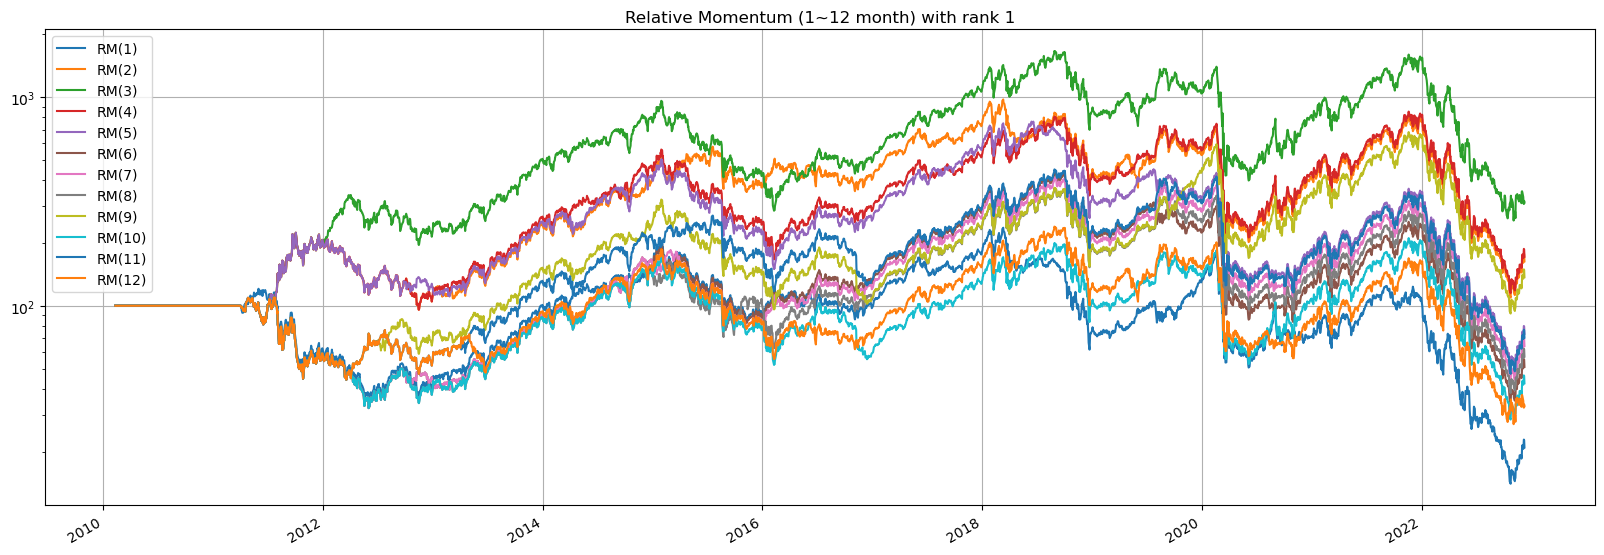

In [10]:
rm1_report.plot(figsize=(20,7), grid=True, logy=True, title="Relative Momentum (1~12 month) with rank 1")

In [11]:
print(rm1_report.prices[start_day:].calc_stats().display())

Stat                 RM(1)       RM(2)       RM(3)       RM(4)       RM(5)       RM(6)       RM(7)       RM(8)       RM(9)       RM(10)      RM(11)      RM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -79.06%     63.39%      212.18%     71.87%      -26.63%     -49.07%     -35.86%     -42.93%     37.08%      -57.48%     -29.59%     -67.03%
Daily Sharpe         0.06  